In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# Data mahasiswa lengkap (41 mahasiswa sesuai data real)
mahasiswa_data = {
    'NPM': ['24083010001', '24083010003', '24083010005', '24083010006', '24083010007',
            '24083010014', '24083010017', '24083010019', '24083010028', '24083010029',
            '24083010034', '24083010037', '24083010042', '24083010044', '24083010045',
            '24083010047', '24083010048', '24083010051', '24083010054', '24083010055',
            '24083010057', '24083010059', '24083010061', '24083010063', '24083010065',
            '24083010069', '24083010074', '24083010075', '24083010077', '24083010079',
            '24083010081', '24083010084', '24083010089', '24083010090', '24083010095',
            '24083010099', '24083010105', '24083010106', '24083010110', '24083010115'],
    'NAMA': ['MADINA HEDY ALIFANTI', 'MARIA DWI KURNIASIH', 'ADINDA PUTRI RACHMAWATI',
             'AQUINA SYABITA', 'VARID PUTRA PRATAMA', 'GAITSA NAZIYA KANSA',
             'Mohammad Alimun Hakim', 'HIZKIA SAMHAN REZAYOSHI', 'RAVFENA AYU DESEMBER SURYOPUTRI',
             'Yohanes Olvin Jun Sole', 'AISYAH AMALIA HAMID', 'FEBRIANI YOLANDA TESSALONIKA',
             'AMELIA RIZQYNA PUTRI', 'VIA AMANDA', 'FANNY WIDYA CAHYANI',
             'SITI NAJA HESTI RACHMAWATI', 'ALFANI NUR AZIZAH', 'Diah Anggraini',
             'AHMAD KENZY FARZAQ', 'Angelina Nirmala Puteri Dika Praktiko', 'MAULIDA APRILIA PUTRI HANDAYANI',
             'Izzati Kamila Putri', 'AULIYA KHOTIMATUZ ZAHROH', 'CARISSA NAURA RAJWA',
             'DIVA ANGGRAENI', 'ERIK SAPUTRA RIFKI', 'MAYA PURNAMA SARI',
             'ACHMAD DANY GUNAWAN', 'Gendis Poerbodani', 'MUHAMMAD WILDAN SULTANSYAH',
             'ESTHI NURANI SRI HANDAYANI', 'Muhammad Naufal Asruzzaman', 'Laudya Meitaneia Sianturi',
             'ADRIAN VEDA DARMAWAN', 'SELVY DWI YULITA SARI', 'Rizky Faza Hafiyyan Nusantara',
             'Indra Maulana R F Y', 'YUNIAR RACHMAWATI', 'KIKY MAUDRY NATASYA',
             'NAJWA SOFIA']
}

# Membuat DataFrame lengkap dengan 40 mahasiswa (ambil 40 dari 41 data)
df_complete = pd.DataFrame(mahasiswa_data)
df_complete = df_complete.head(40)  # Ambil 40 mahasiswa pertama

print("Data 40 Mahasiswa:")
print(df_complete)
print(f"Total mahasiswa: {len(df_complete)}")

Data 40 Mahasiswa:
            NPM                                   NAMA
0   24083010001                   MADINA HEDY ALIFANTI
1   24083010003                    MARIA DWI KURNIASIH
2   24083010005                ADINDA PUTRI RACHMAWATI
3   24083010006                         AQUINA SYABITA
4   24083010007                    VARID PUTRA PRATAMA
5   24083010014                    GAITSA NAZIYA KANSA
6   24083010017                  Mohammad Alimun Hakim
7   24083010019                HIZKIA SAMHAN REZAYOSHI
8   24083010028        RAVFENA AYU DESEMBER SURYOPUTRI
9   24083010029                 Yohanes Olvin Jun Sole
10  24083010034                    AISYAH AMALIA HAMID
11  24083010037           FEBRIANI YOLANDA TESSALONIKA
12  24083010042                   AMELIA RIZQYNA PUTRI
13  24083010044                             VIA AMANDA
14  24083010045                    FANNY WIDYA CAHYANI
15  24083010047             SITI NAJA HESTI RACHMAWATI
16  24083010048                      ALFANI NU

In [17]:
# LANGKAH 1: Lengkapi nilai dalam tabel/matriks C (range 0-1, resolusi 0.1)
np.random.seed(42)  # Untuk reproducibility

# Kolom A: ADIL DAN AMANAH (0-1)
kolom_A = np.round(np.random.uniform(0.3, 1.0, 40), 1)

# Kolom B: SUKA MEMBANTU (0-1)
kolom_B = np.round(np.random.uniform(0.2, 1.0, 40), 1)

# Kolom C: NYAMBUNG KALAU NGOMONG (0-1)
kolom_C = np.round(np.random.uniform(0.4, 1.0, 40), 1)

# Kolom D: ASYIK DAN MENARIK (0-1)
kolom_D = np.round(np.random.uniform(0.3, 1.0, 40), 1)

# Membuat matriks C (40x4)
C = np.column_stack([kolom_A, kolom_B, kolom_C, kolom_D])

df_complete['ADIL_DAN_AMANAH'] = kolom_A
df_complete['SUKA_MEMBANTU'] = kolom_B
df_complete['NYAMBUNG_KALAU_NGOMONG'] = kolom_C
df_complete['ASYIK_DAN_MENARIK'] = kolom_D

print("\nMatriks C (Sample 10 baris pertama):")
print(df_complete[['NAMA', 'ADIL_DAN_AMANAH', 'SUKA_MEMBANTU', 'NYAMBUNG_KALAU_NGOMONG', 'ASYIK_DAN_MENARIK']].head(10))


Matriks C (Sample 10 baris pertama):
                              NAMA  ADIL_DAN_AMANAH  SUKA_MEMBANTU  \
0             MADINA HEDY ALIFANTI              0.6            0.3   
1              MARIA DWI KURNIASIH              1.0            0.6   
2          ADINDA PUTRI RACHMAWATI              0.8            0.2   
3                   AQUINA SYABITA              0.7            0.9   
4              VARID PUTRA PRATAMA              0.4            0.4   
5              GAITSA NAZIYA KANSA              0.4            0.7   
6            Mohammad Alimun Hakim              0.3            0.4   
7          HIZKIA SAMHAN REZAYOSHI              0.9            0.6   
8  RAVFENA AYU DESEMBER SURYOPUTRI              0.7            0.6   
9           Yohanes Olvin Jun Sole              0.8            0.3   

   NYAMBUNG_KALAU_NGOMONG  ASYIK_DAN_MENARIK  
0                     0.9                0.9  
1                     0.8                0.9  
2                     0.6                0.5  
3  

Matriks C berisi skor 40 mahasiswa pada empat karakteristik: Adil & Amanah, Suka Membantu, Nyambung Kalau Ngomong, dan Asyik & Menarik.  
- Skor bernilai 0–1 (semakin tinggi semakin baik).  
- Contoh: Maria Dwi Kurniasih mendapat skor 1.0 pada Adil & Amanah, menunjukkan tingkat keadilan/amanah yang sangat tinggi.  
- Secara umum, penyebaran nilai merata tanpa ada dominasi ekstrim dari satu mahasiswa.

In [18]:
# LANGKAH 2: Tentukan matriks prioritas P
# Contoh bobot yang objektif berdasarkan kepentingan karakteristik
P = np.array([
    [0.3],  # ADIL DAN AMANAH (30% - sangat penting untuk kepercayaan)
    [0.25], # SUKA MEMBANTU (25% - penting untuk kerjasama)
    [0.25], # NYAMBUNG KALAU NGOMONG (25% - penting untuk komunikasi)
    [0.2]   # ASYIK DAN MENARIK (20% - penting tapi tidak kritis)
])

print(f"\nMatriks Prioritas P:")
print(f"ADIL DAN AMANAH: {P[0][0]}")
print(f"SUKA MEMBANTU: {P[1][0]}")
print(f"NYAMBUNG KALAU NGOMONG: {P[2][0]}")
print(f"ASYIK DAN MENARIK: {P[3][0]}")


Matriks Prioritas P:
ADIL DAN AMANAH: 0.3
SUKA MEMBANTU: 0.25
NYAMBUNG KALAU NGOMONG: 0.25
ASYIK DAN MENARIK: 0.2


Matriks Prioritas berisi bobot kepentingan tiap karakteristik.  
- Adil & Amanah (0.3) → bobot terbesar, karena dasar kepercayaan.  
- Suka Membantu (0.25) dan Nyambung Kalau Ngomong (0.25) → sama-sama penting untuk kerja sama dan komunikasi.  
- Asyik & Menarik (0.2) → tetap berpengaruh, tetapi tidak sepenting karakteristik lain.  

Interpretasi: semakin tinggi skor pada karakteristik yang berbobot besar, semakin tinggi skor total mahasiswa.

In [19]:
# LANGKAH 3: Hitung C.P dan pilih 4 mahasiswa dengan nilai tertinggi
CP = C @ P
df_complete['TOTAL_SCORE'] = CP.flatten()

# Pilih 4 mahasiswa dengan skor tertinggi
top_4 = df_complete.nlargest(4, 'TOTAL_SCORE')
print(f"\n4 Mahasiswa dengan nilai tertinggi:")
print(top_4[['NAMA', 'ADIL_DAN_AMANAH', 'SUKA_MEMBANTU', 'NYAMBUNG_KALAU_NGOMONG', 'ASYIK_DAN_MENARIK', 'TOTAL_SCORE']])


4 Mahasiswa dengan nilai tertinggi:
                     NAMA  ADIL_DAN_AMANAH  SUKA_MEMBANTU  \
34  SELVY DWI YULITA SARI              1.0            0.8   
33   ADRIAN VEDA DARMAWAN              1.0            0.9   
1     MARIA DWI KURNIASIH              1.0            0.6   
12   AMELIA RIZQYNA PUTRI              0.9            1.0   

    NYAMBUNG_KALAU_NGOMONG  ASYIK_DAN_MENARIK  TOTAL_SCORE  
34                     0.8                1.0        0.900  
33                     0.9                0.6        0.870  
1                      0.8                0.9        0.830  
12                     0.9                0.4        0.825  


Hasil perkalian matriks C dan P menghasilkan Total Score untuk setiap mahasiswa.  
Empat mahasiswa dengan skor tertinggi adalah:  
1. Selvy Dwi Yulita Sari – 0.900  
2. Adrian Veda Darmawan – 0.870  
3. Maria Dwi Kurniasih – 0.830  
4. Amelia Rizqyna Putri – 0.825  

Mereka unggul karena memiliki kombinasi karakteristik yang seimbang, terutama pada Adil & Amanah dan Suka Membantu yang tinggi.

In [20]:
# LANGKAH 4: Hitung matriks kovarian dan korelasi
kelasku = C  # Matriks 40x4
cov_mat = np.cov(kelasku, rowvar=False, ddof=1)
corr_mat = np.corrcoef(kelasku, rowvar=False)

print(f"\nMatriks Kovarian:")
print(cov_mat)
print(f"\nMatriks Korelasi:")
print(corr_mat)


Matriks Kovarian:
[[ 0.04848718  0.00851282  0.01029487  0.00117949]
 [ 0.00851282  0.06574359  0.00276923 -0.0045641 ]
 [ 0.01029487  0.00276923  0.03101923  0.00164103]
 [ 0.00117949 -0.0045641   0.00164103  0.04451282]]

Matriks Korelasi:
[[ 1.          0.15077638  0.26545565  0.02538851]
 [ 0.15077638  1.          0.06132209 -0.08436963]
 [ 0.26545565  0.06132209  1.          0.04416287]
 [ 0.02538851 -0.08436963  0.04416287  1.        ]]


Matriks Kovarian menunjukkan variasi antar karakteristik:  
- Varians terbesar: Suka Membantu (0.0657) → paling bervariasi antar mahasiswa.  
- Varians terkecil: Nyambung Kalau Ngomong (0.0310) → relatif stabil.  

Matriks Korelasi menunjukkan keeratan hubungan (–1 s.d. +1):  
- Tertinggi: Adil & Amanah dengan Nyambung Kalau Ngomong (0.265) → mahasiswa yang adil cenderung lebih komunikatif.  
- Korelasi negatif: Suka Membantu dengan Asyik & Menarik (–0.084) → suka membantu tidak selalu berkaitan dengan kesan menarik.  
- Secara umum, korelasi rendah (<0.3), sehingga karakteristik berdiri sendiri.


In [21]:
# LANGKAH 5: Hitung cosine similarity antar siswa
X_matrix = C  # 40x4 matrix
norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)
cosine_sim = (X_matrix @ X_matrix.T) / (norms @ norms.T)

students = df_complete['NAMA'].tolist()
cosine_df = pd.DataFrame(cosine_sim, index=students, columns=students)

print(f"\nCosine Similarity (Sample 5x5):")
print(cosine_df.iloc[:5, :5])


Cosine Similarity (Sample 5x5):
                         MADINA HEDY ALIFANTI  MARIA DWI KURNIASIH  \
MADINA HEDY ALIFANTI                 1.000000             0.957797   
MARIA DWI KURNIASIH                  0.957797             1.000000   
ADINDA PUTRI RACHMAWATI              0.936292             0.971681   
AQUINA SYABITA                       0.769975             0.899892   
VARID PUTRA PRATAMA                  0.972987             0.971192   

                         ADINDA PUTRI RACHMAWATI  AQUINA SYABITA  \
MADINA HEDY ALIFANTI                    0.936292        0.769975   
MARIA DWI KURNIASIH                     0.971681        0.899892   
ADINDA PUTRI RACHMAWATI                 1.000000        0.816262   
AQUINA SYABITA                          0.816262        1.000000   
VARID PUTRA PRATAMA                     0.922115        0.879883   

                         VARID PUTRA PRATAMA  
MADINA HEDY ALIFANTI                0.972987  
MARIA DWI KURNIASIH                 0.97119

Cosine similarity mengukur kemiripan antar mahasiswa berdasarkan keempat karakteristik. Nilai mendekati 1 berarti sangat mirip.  
- Contoh: Maria Dwi Kurniasih dan Adinda Putri Rachmawati memiliki similarity 0.97, artinya profil mereka sangat mirip.  
- Madina Hedy Alifanti dan Varid Putra Pratama juga mirip (0.97).  

Interpretasi: analisis ini bisa digunakan untuk melihat pasangan mahasiswa yang berpotensi cocok bekerja sama karena memiliki sifat yang hampir sama.

/tmp/ipython-input-1380555839.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=['Adil', 'Membantu', 'Nyambung', 'Asyik'])


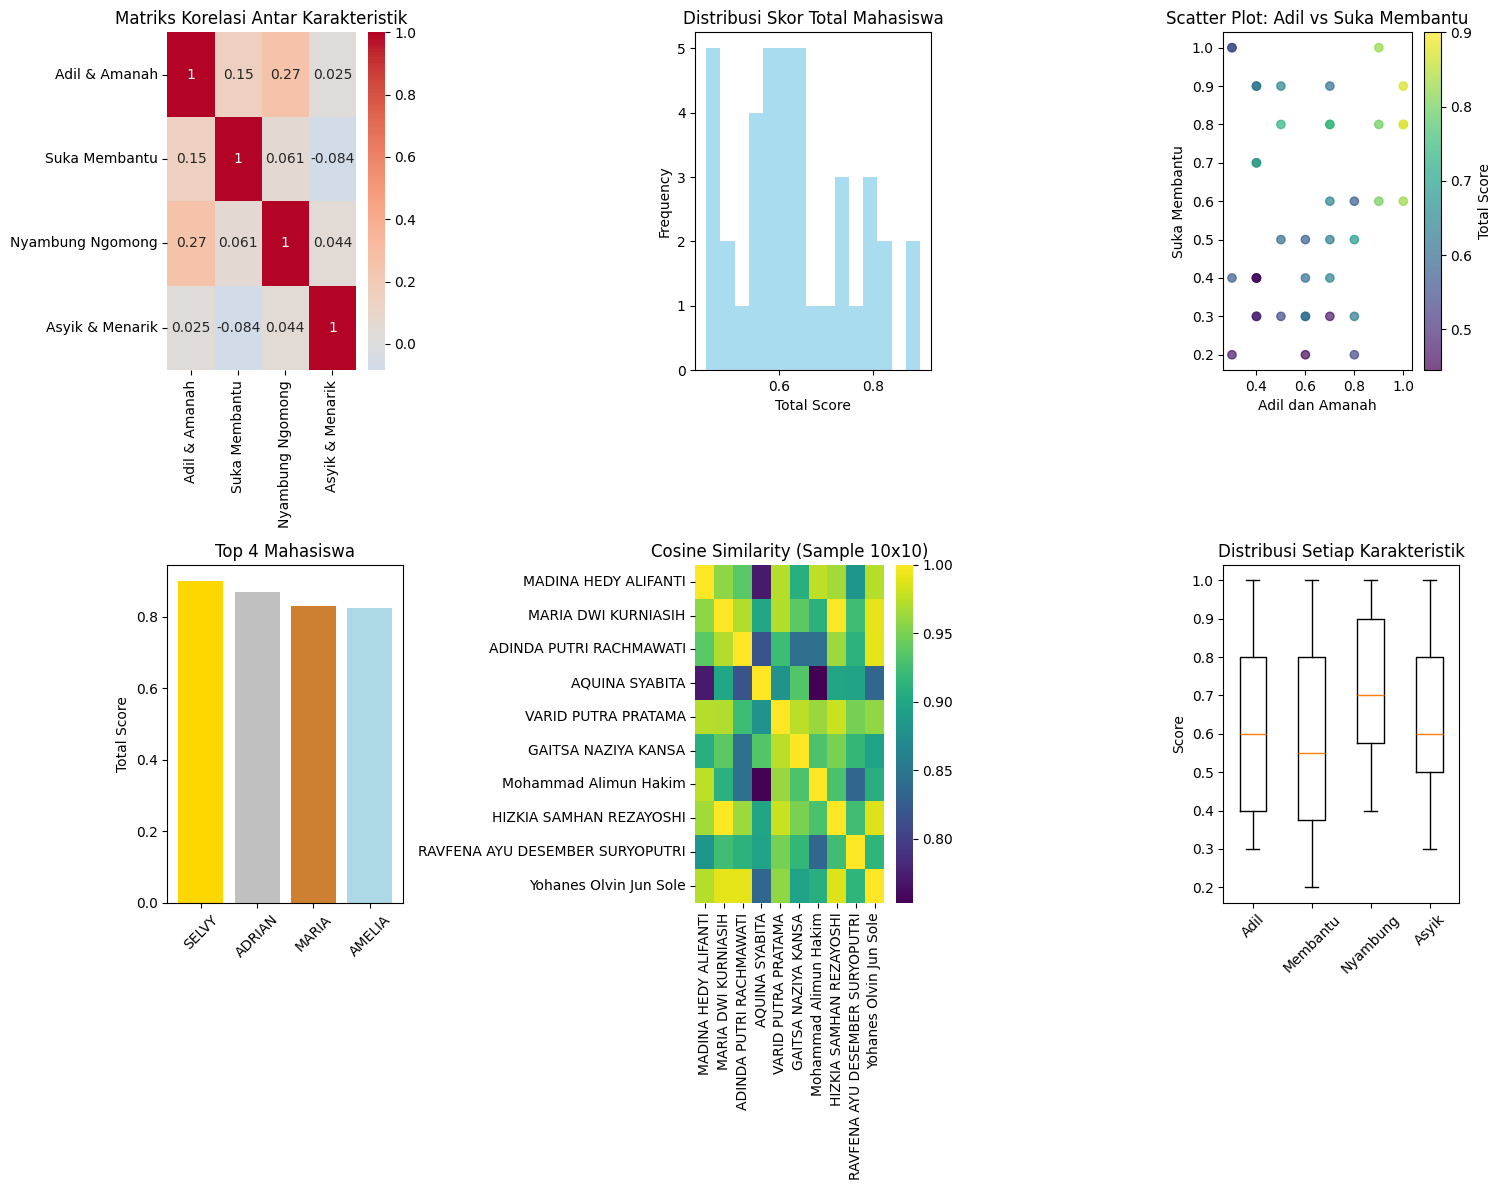

In [25]:
# VISUALISASI
plt.figure(figsize=(15, 12))

# 1. Heatmap Korelasi
plt.subplot(2, 3, 1)
labels = ['Adil & Amanah', 'Suka Membantu', 'Nyambung Ngomong', 'Asyik & Menarik']
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0,
            xticklabels=labels, yticklabels=labels)
plt.title('Matriks Korelasi Antar Karakteristik')

# 2. Distribusi Skor Total
plt.subplot(2, 3, 2)
plt.hist(df_complete['TOTAL_SCORE'], bins=15, alpha=0.7, color='skyblue')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribusi Skor Total Mahasiswa')

# 3. Scatter plot karakteristik
plt.subplot(2, 3, 3)
plt.scatter(df_complete['ADIL_DAN_AMANAH'], df_complete['SUKA_MEMBANTU'],
           c=df_complete['TOTAL_SCORE'], cmap='viridis', alpha=0.7)
plt.xlabel('Adil dan Amanah')
plt.ylabel('Suka Membantu')
plt.title('Scatter Plot: Adil vs Suka Membantu')
plt.colorbar(label='Total Score')

# 4. Bar chart top 4 mahasiswa
plt.subplot(2, 3, 4)
top_4_short_names = [name.split()[0] for name in top_4['NAMA']]
plt.bar(range(4), top_4['TOTAL_SCORE'], color=['gold', 'silver', '#CD7F32', 'lightblue'])
plt.xticks(range(4), top_4_short_names, rotation=45)
plt.ylabel('Total Score')
plt.title('Top 4 Mahasiswa')

# 5. Heatmap Cosine Similarity (sample 10x10)
plt.subplot(2, 3, 5)
sample_cosine = cosine_df.iloc[:10, :10]
sns.heatmap(sample_cosine, annot=False, cmap='viridis', cbar=True)
plt.title('Cosine Similarity (Sample 10x10)')

# 6. Boxplot karakteristik
plt.subplot(2, 3, 6)
data_for_box = [kolom_A, kolom_B, kolom_C, kolom_D]
plt.boxplot(data_for_box, labels=['Adil', 'Membantu', 'Nyambung', 'Asyik'])
plt.ylabel('Score')
plt.title('Distribusi Setiap Karakteristik')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Heatmap Korelasi → memperlihatkan hubungan antar karakteristik (tidak ada korelasi yang sangat kuat).  
- Distribusi Skor Total → skor mahasiswa tersebar merata, tidak menumpuk di satu sisi.  
- Scatter Plot (Adil vs Membantu) → mahasiswa dengan skor total tinggi umumnya seimbang pada dua aspek ini.  
- Bar Chart Top 4 → menegaskan siapa saja mahasiswa dengan skor tertinggi.  
- Heatmap Cosine Similarity → memperlihatkan kelompok mahasiswa yang mirip satu sama lain.  
- Boxplot → karakteristik Suka Membantu punya variasi paling besar, sementara Nyambung Ngomong paling kecil.


In [26]:
# ANALISIS TAMBAHAN: PCA
print(f"\n" + "="*50)
print("ANALISIS TAMBAHAN: PRINCIPAL COMPONENT ANALYSIS")
print("="*50)

# Standardize the data
scaler = StandardScaler()
C_scaled = scaler.fit_transform(C)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(C_scaled)

# Print explained variance ratio
print(f"Explained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

print(f"Cumulative Explained Variance: {np.cumsum(pca.explained_variance_ratio_)}")

# PCA Components
print(f"\nPCA Components (Loading Matrix):")
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(4)],
    index=['Adil & Amanah', 'Suka Membantu', 'Nyambung Ngomong', 'Asyik & Menarik']
)
print(components_df)


ANALISIS TAMBAHAN: PRINCIPAL COMPONENT ANALYSIS
Explained Variance Ratio:
PC1: 0.334 (33.4%)
PC2: 0.269 (26.9%)
PC3: 0.218 (21.8%)
PC4: 0.179 (17.9%)
Cumulative Explained Variance: [0.33360091 0.60231271 0.82066319 1.        ]

PCA Components (Loading Matrix):
                       PC1       PC2       PC3       PC4
Adil & Amanah     0.674207  0.067012 -0.059959  0.733048
Suka Membantu     0.409273 -0.549513  0.676131 -0.270884
Nyambung Ngomong  0.614083  0.255195 -0.413482 -0.621941
Asyik & Menarik   0.029026  0.792730  0.606864 -0.049526


Principal Component Analysis (PCA) menyederhanakan data menjadi komponen utama:  
- PC1 (33.4%) terutama dipengaruhi oleh Adil & Amanah dan Nyambung Ngomong.  
- PC2 (26.9%) terutama dipengaruhi oleh Asyik & Menarik.  
- PC3 (21.8%) dan PC4 (17.9%) melengkapi variasi.  

Total dua komponen pertama sudah menjelaskan sekitar 60% variasi, artinya cukup representatif.  

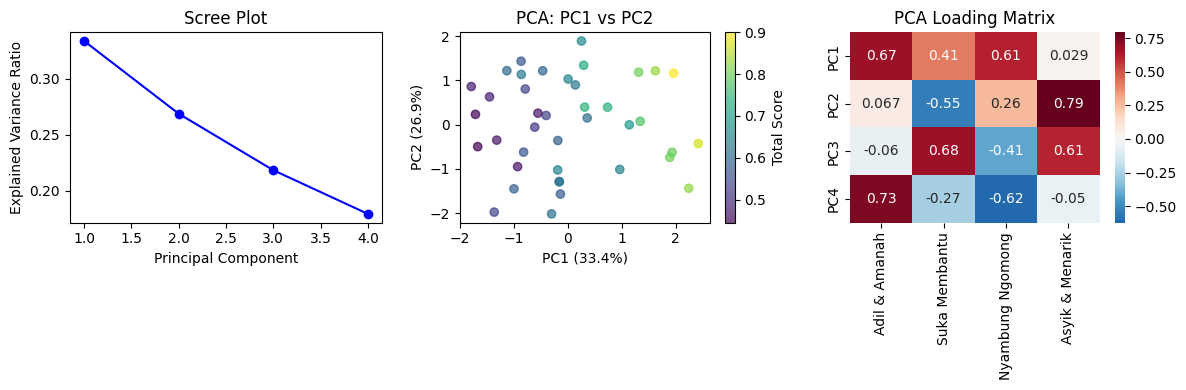

In [27]:
# Plot PCA
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(range(1, 5), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

plt.subplot(1, 3, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_complete['TOTAL_SCORE'],
           cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('PCA: PC1 vs PC2')
plt.colorbar(label='Total Score')

plt.subplot(1, 3, 3)
sns.heatmap(components_df.T, annot=True, cmap='RdBu_r', center=0)
plt.title('PCA Loading Matrix')

plt.tight_layout()
plt.show()

1. **Scree Plot**  
   Grafik scree plot menunjukkan proporsi varian yang dijelaskan oleh masing-masing komponen utama.  
   - PC1 menjelaskan sekitar 33.4% variasi data.  
   - PC2 menjelaskan sekitar 26.9% variasi data.  
   - PC3 menjelaskan 21.8% dan PC4 sebesar 17.9%.  
   Total dua komponen pertama sudah mencakup sekitar 60% variasi, cukup representatif untuk menyederhanakan data.

2. **PCA: PC1 vs PC2**  
   Scatter plot menunjukkan distribusi mahasiswa pada dua komponen utama pertama.  
   - Mahasiswa dengan skor total tinggi cenderung muncul pada area tertentu dengan warna yang lebih terang (karena diberi warna berdasarkan Total Score).  
   - Hal ini menunjukkan bahwa kombinasi faktor PC1 (Adil & Amanah, Nyambung Ngomong) dan PC2 (Asyik & Menarik) sudah cukup membedakan karakteristik antar mahasiswa.

3. **PCA Loading Matrix**  
   Matriks loading memperlihatkan kontribusi tiap karakteristik terhadap komponen utama.  
   - PC1 dipengaruhi paling besar oleh Adil & Amanah (0.67) dan Nyambung Ngomong (0.61).  
   - PC2 dipengaruhi oleh Asyik & Menarik (0.79) dan juga Suka Membantu (–0.55).  
   - PC3 dan PC4 lebih kompleks, tetapi kontribusi utamanya ada pada Suka Membantu (0.68 di PC3) dan Adil & Amanah (0.73 di PC4).  

Interpretasi: Faktor utama yang membedakan mahasiswa adalah kombinasi sifat adil/amanah dan kemampuan komunikasi (PC1), disusul faktor kesan menarik (PC2). Dengan PCA, data yang semula 4 dimensi dapat diringkas ke 2 dimensi tanpa kehilangan terlalu banyak informasi.